In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# create variables 
x = cp.Variable()
y = cp.Variable()

# Create constraints
constraints = [x + y == 1,
                x >= 1]

# objective function
obj_fun = cp.Maximize(x)

prob = cp.Problem(obj_fun,constraints)
prob.solve()

inf

In [17]:
print(prob.status)
print(prob.value)
print(x.value,y.value)

unbounded
inf
None None


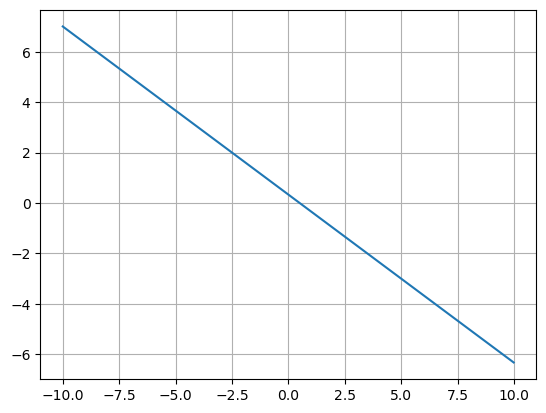

In [20]:
n = 2
vecA = np.array([2,3])
b = 1
x1 = np.arange(-10,10,0.01)
x2 = (1 - 2*x1)/3
plt.plot(x1,x2)
plt.grid(True)
plt.show()

Max flow problem

In [2]:
# Variables
x12 = cp.Variable()
x13 = cp.Variable()
x23 = cp.Variable()
x32 = cp.Variable()
x34 = cp.Variable()
x24 = cp.Variable()
# Constraints
c12 = 2
c13 = 1
c32 = 1
c34 = 1
c24 = 1

In [11]:
constraints = [x12 <= c12, x13<=c13, x23+x32 <= c32, x34 <= c34, x24<=c24, x12>=0, x13>=0, x23>=0, x32>=0, x34>=0, x24>=0, x12+x32-x23-x34==0, x13+x23-x34-x32==0]
objective = cp.Maximize(x12+x13)
prob = cp.Problem(objective, constraints)
print("Max flow = ",prob.solve())

Max flow =  1.9999999994728377


In [6]:
print(x12.value,x13.value,x23.value,x32.value,x34.value,x24.value)

1.9999999999294633 0.9999999999652593 0.3333333260904436 0.33333332609044314 0.49999998312666444 0.49999998312666444


In [38]:
X = cp.Variable((4,4))
C = np.array([[0,2,1,0],[2,0,1,1],[1,1,0,1],[0,1,1,0]])
print(C)
A = np.zeros((4,4))
A[C>0] = 1
print(A)
constraints = [X>=0, X<=C, X[:,0]==0, X[3,:]==0 , ((cp.sum(X[1:3,:],axis=1))-(cp.sum(X[:,1:3],axis=0))) == 0]
objective = cp.Maximize(cp.sum(X[0,:]))
prob = cp.Problem(objective,constraints)
print(prob.solve())
print(X.value)
print(cp.sum(X,axis=1).value)
print(cp.sum(X[1:3,1:3],axis=1).value)

[[0 2 1 0]
 [2 0 1 1]
 [1 1 0 1]
 [0 1 1 0]]
[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]]
2.000000000091887
[[-1.07127669e-13  1.30935407e+00  6.90645934e-01  1.64842399e-11]
 [-5.27771172e-15  0.00000000e+00  6.54677703e-01  1.00000000e+00]
 [-3.22376157e-16  3.45323636e-01  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  2.91274916e-13  2.85748353e-13  0.00000000e+00]]
[2.00000000e+00 1.65467770e+00 1.34532364e+00 5.77023269e-13]
[0.6546777  0.34532364]
